In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
insurance_data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_data.shape

(1338, 7)

In [5]:
# one hot encoded data, so that all the data is in integers
insurance_one_hot = pd.get_dummies(insurance_data)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [6]:
X = insurance_one_hot.drop("charges", axis=1)
print(X.head(), X.shape)
y = insurance_one_hot["charges"]
print(y.head(), y.shape)

   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0   19  27.900         0           1         0          0           1   
1   18  33.770         1           0         1          1           0   
2   28  33.000         3           0         1          1           0   
3   33  22.705         0           0         1          1           0   
4   32  28.880         0           0         1          1           0   

   region_northeast  region_northwest  region_southeast  region_southwest  
0                 0                 0                 0                 1  
1                 0                 0                 1                 0  
2                 0                 0                 1                 0  
3                 0                 1                 0                 0  
4                 0                 1                 0                 0   (1338, 11)
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: cha

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(y_train), len(X_test), len(y_test))

1070 1070 268 268


Model: "Insurance_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 10)                120       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


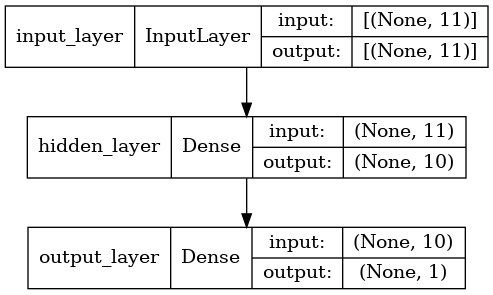

In [14]:
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[11], name="input_layer"),
    tf.keras.layers.Dense(units=10, name="hidden_layer"),
    tf.keras.layers.Dense(units=10, name="hidden_layer"),
    tf.keras.layers.Dense(units=1, name="output_layer")
], name="Insurance_Model")

insurance_model.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.SGD(),
                       metrics=["mae"])
insurance_model.summary()
tf.keras.utils.plot_model(model=insurance_model, show_shapes=True)

In [15]:
X_train_tensors = tf.constant(X_train, dtype=tf.float32)
X_train_tensors
y_train_tensors = tf.constant(y_train, dtype=tf.float32)
# insurance_model.fit(tf.expand_dims(X_train_tensors, axis=-1), y_train_tensors, epochs=100)
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 4ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7886.7769 - mae: 7886.7769
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7558.1475 - mae: 7558.1475
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7792.0229 - mae: 7792.0229
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7748.3892 - mae: 7748.3892
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7595.3955 - mae: 7595.3955
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7698.5591 - mae: 7698.5591
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7496.7788 - mae: 7496.7788
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7493.1748 - mae: 7493.1748

34/34 [==============================] - 0s 4ms/step - loss: 7176.5220 - mae: 7176.5220
Epoch 83/100
34/34 [==============================] - 0s 4ms/step - loss: 7425.6289 - mae: 7425.6289
Epoch 84/100
34/34 [==============================] - 0s 4ms/step - loss: 7403.1304 - mae: 7403.1304
Epoch 85/100
34/34 [==============================] - 0s 4ms/step - loss: 7356.0083 - mae: 7356.0083
Epoch 86/100
34/34 [==============================] - 0s 4ms/step - loss: 7484.7285 - mae: 7484.7285
Epoch 87/100
34/34 [==============================] - 0s 4ms/step - loss: 7217.6079 - mae: 7217.6079
Epoch 88/100
34/34 [==============================] - 0s 4ms/step - loss: 7260.9990 - mae: 7260.9990
Epoch 89/100
34/34 [==============================] - 0s 4ms/step - loss: 7134.1558 - mae: 7134.1558
Epoch 90/100
34/34 [==============================] - 0s 4ms/step - loss: 7083.4355 - mae: 7083.4355
Epoch 91/100
34/34 [==============================] - 0s 4ms/step - loss: 7254.1782 - mae: 7254.1782
Epo

In [16]:
insurance_model.evaluate(X_test, y_test)
# this means the model is worse by + or - 7000

9/9 [==============================] - 0s 4ms/step - loss: 7023.3296 - mae: 7023.3296


[7023.32958984375, 7023.32958984375]

# To improve the model
   - Change the optimizer to adam
     insurance_model_2
   - Change the number of epochs + adam
     insurance_model_3

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 10)                120       
                                                                 
 hidden_layer_2 (Dense)      (None, 100)               1100      
                                                                 
 output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 2,230
Trainable params: 2,230
Non-trainable params: 0
_________________________________________________________________


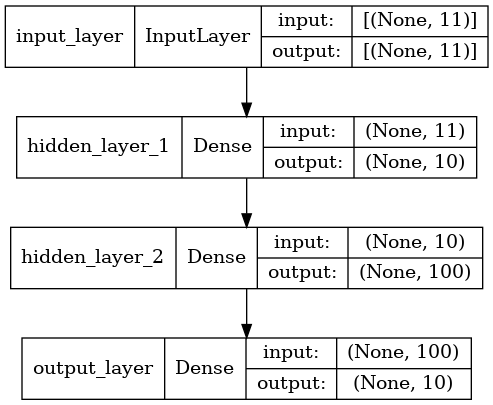

In [24]:
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[11], name="input_layer"),
    tf.keras.layers.Dense(units=10, name="hidden_layer_1"),
    tf.keras.layers.Dense(units=100, name="hidden_layer_2"),
    tf.keras.layers.Dense(units=10, name="output_layer"),
])
insurance_model_2.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])
insurance_model_2.summary()
tf.keras.utils.plot_model(model=insurance_model_2, show_shapes=True)

In [25]:
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 4ms/step - loss: 13333.9248 - mae: 13333.9248
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13272.3662 - mae: 13272.3662
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 13088.1758 - mae: 13088.1758
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 12644.1416 - mae: 12644.1416
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 11779.5830 - mae: 11779.5830
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 10407.8896 - mae: 10407.8896
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 8834.4854 - mae: 8834.4854
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7701.9604 - mae: 7701.9604
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 7395.7598 - mae: 7395.7598
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 7363.9902 - ma

34/34 [==============================] - 0s 4ms/step - loss: 6270.7988 - mae: 6270.7988
Epoch 82/100
34/34 [==============================] - 0s 4ms/step - loss: 6259.6855 - mae: 6259.6855
Epoch 83/100
34/34 [==============================] - 0s 4ms/step - loss: 6247.8462 - mae: 6247.8462
Epoch 84/100
34/34 [==============================] - 0s 4ms/step - loss: 6232.9785 - mae: 6232.9785
Epoch 85/100
34/34 [==============================] - 0s 4ms/step - loss: 6222.6221 - mae: 6222.6221
Epoch 86/100
34/34 [==============================] - 0s 4ms/step - loss: 6208.6685 - mae: 6208.6685
Epoch 87/100
34/34 [==============================] - 0s 4ms/step - loss: 6196.6113 - mae: 6196.6113
Epoch 88/100
34/34 [==============================] - 0s 4ms/step - loss: 6183.2407 - mae: 6183.2407
Epoch 89/100
34/34 [==============================] - 0s 4ms/step - loss: 6170.1401 - mae: 6170.1401
Epoch 90/100
34/34 [==============================] - 0s 4ms/step - loss: 6153.4912 - mae: 6153.4912
Epo

In [31]:
insurance_model_2.evaluate(X_test, y_test)
# This means that the model will do an guess with an +/- 5000 error
# not so good

9/9 [==============================] - 0s 3ms/step - loss: 5836.8384 - mae: 5836.8384


[5836.83837890625, 5836.83837890625]

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 10)                120       
                                                                 
 hidden_layer_2 (Dense)      (None, 100)               1100      
                                                                 
 hidden_layer_3 (Dense)      (None, 10)                1010      
                                                                 
Total params: 2,230
Trainable params: 2,230
Non-trainable params: 0
_________________________________________________________________


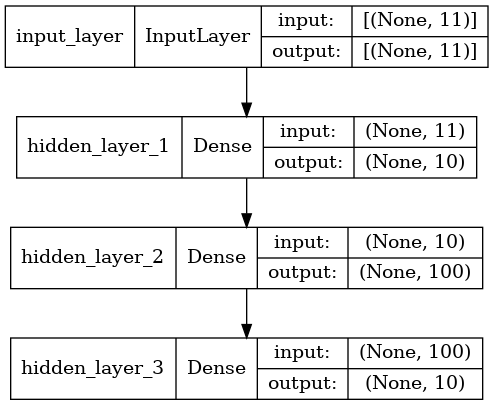

In [34]:
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[11], name="input_layer"),
    tf.keras.layers.Dense(units=10, name="hidden_layer_1"),
    tf.keras.layers.Dense(units=100, name="hidden_layer_2"),
    tf.keras.layers.Dense(units=10, name="hidden_layer_3"),
])
insurance_model_3.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])
insurance_model_3.summary()
tf.keras.utils.plot_model(model=insurance_model_3, show_shapes=True)

In [35]:
model_history = insurance_model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 0s 4ms/step - loss: 13329.1650 - mae: 13329.1650
Epoch 2/500
34/34 [==============================] - 0s 4ms/step - loss: 13258.2227 - mae: 13258.2227
Epoch 3/500
34/34 [==============================] - 0s 4ms/step - loss: 13056.8564 - mae: 13056.8564
Epoch 4/500
34/34 [==============================] - 0s 4ms/step - loss: 12583.3701 - mae: 12583.3701
Epoch 5/500
34/34 [==============================] - 0s 4ms/step - loss: 11680.0283 - mae: 11680.0283
Epoch 6/500
34/34 [==============================] - 0s 4ms/step - loss: 10295.8086 - mae: 10295.8086
Epoch 7/500
34/34 [==============================] - 0s 5ms/step - loss: 8762.4229 - mae: 8762.4229
Epoch 8/500
34/34 [==============================] - 0s 4ms/step - loss: 7709.0825 - mae: 7709.0825
Epoch 9/500
34/34 [==============================] - 0s 4ms/step - loss: 7435.8433 - mae: 7435.8433
Epoch 10/500
34/34 [==============================] - 0s 4ms/step - loss: 7405.8760 - ma

34/34 [==============================] - 0s 5ms/step - loss: 6263.3730 - mae: 6263.3730
Epoch 82/500
34/34 [==============================] - 0s 4ms/step - loss: 6253.0752 - mae: 6253.0752
Epoch 83/500
34/34 [==============================] - 0s 4ms/step - loss: 6239.6475 - mae: 6239.6475
Epoch 84/500
34/34 [==============================] - 0s 4ms/step - loss: 6225.9443 - mae: 6225.9443
Epoch 85/500
34/34 [==============================] - 0s 4ms/step - loss: 6215.4546 - mae: 6215.4546
Epoch 86/500
34/34 [==============================] - 0s 4ms/step - loss: 6201.2568 - mae: 6201.2568
Epoch 87/500
34/34 [==============================] - 0s 4ms/step - loss: 6189.4233 - mae: 6189.4233
Epoch 88/500
34/34 [==============================] - 0s 4ms/step - loss: 6175.1030 - mae: 6175.1030
Epoch 89/500
34/34 [==============================] - 0s 4ms/step - loss: 6162.6147 - mae: 6162.6147
Epoch 90/500
34/34 [==============================] - 0s 4ms/step - loss: 6145.9531 - mae: 6145.9531
Epo

34/34 [==============================] - 0s 4ms/step - loss: 3794.1248 - mae: 3794.1248
Epoch 162/500
34/34 [==============================] - 0s 5ms/step - loss: 3791.0630 - mae: 3791.0630
Epoch 163/500
34/34 [==============================] - 0s 4ms/step - loss: 3788.8638 - mae: 3788.8638
Epoch 164/500
34/34 [==============================] - 0s 4ms/step - loss: 3790.5627 - mae: 3790.5627
Epoch 165/500
34/34 [==============================] - 0s 4ms/step - loss: 3783.5371 - mae: 3783.5371
Epoch 166/500
34/34 [==============================] - 0s 4ms/step - loss: 3784.6917 - mae: 3784.6917
Epoch 167/500
34/34 [==============================] - 0s 4ms/step - loss: 3786.0044 - mae: 3786.0044
Epoch 168/500
34/34 [==============================] - 0s 4ms/step - loss: 3777.0933 - mae: 3777.0933
Epoch 169/500
34/34 [==============================] - 0s 4ms/step - loss: 3774.3916 - mae: 3774.3916
Epoch 170/500
34/34 [==============================] - 0s 4ms/step - loss: 3773.0549 - mae: 3773

34/34 [==============================] - 0s 4ms/step - loss: 3670.5432 - mae: 3670.5432
Epoch 242/500
34/34 [==============================] - 0s 4ms/step - loss: 3669.3252 - mae: 3669.3252
Epoch 243/500
34/34 [==============================] - 0s 4ms/step - loss: 3666.9060 - mae: 3666.9060
Epoch 244/500
34/34 [==============================] - 0s 4ms/step - loss: 3672.5325 - mae: 3672.5325
Epoch 245/500
34/34 [==============================] - 0s 4ms/step - loss: 3665.6765 - mae: 3665.6765
Epoch 246/500
34/34 [==============================] - 0s 4ms/step - loss: 3662.3789 - mae: 3662.3789
Epoch 247/500
34/34 [==============================] - 0s 4ms/step - loss: 3665.5847 - mae: 3665.5847
Epoch 248/500
34/34 [==============================] - 0s 4ms/step - loss: 3673.8677 - mae: 3673.8677
Epoch 249/500
34/34 [==============================] - 0s 5ms/step - loss: 3660.7651 - mae: 3660.7651
Epoch 250/500
34/34 [==============================] - 0s 4ms/step - loss: 3660.6770 - mae: 3660

34/34 [==============================] - 0s 4ms/step - loss: 3544.6509 - mae: 3544.6509
Epoch 322/500
34/34 [==============================] - 0s 4ms/step - loss: 3549.3450 - mae: 3549.3450
Epoch 323/500
34/34 [==============================] - 0s 5ms/step - loss: 3538.3652 - mae: 3538.3652
Epoch 324/500
34/34 [==============================] - 0s 4ms/step - loss: 3536.3606 - mae: 3536.3606
Epoch 325/500
34/34 [==============================] - 0s 4ms/step - loss: 3536.4285 - mae: 3536.4285
Epoch 326/500
34/34 [==============================] - 0s 4ms/step - loss: 3536.4614 - mae: 3536.4614
Epoch 327/500
34/34 [==============================] - 0s 4ms/step - loss: 3530.3245 - mae: 3530.3245
Epoch 328/500
34/34 [==============================] - 0s 4ms/step - loss: 3542.7988 - mae: 3542.7988
Epoch 329/500
34/34 [==============================] - 0s 4ms/step - loss: 3540.4595 - mae: 3540.4595
Epoch 330/500
34/34 [==============================] - 0s 5ms/step - loss: 3527.4912 - mae: 3527

34/34 [==============================] - 0s 4ms/step - loss: 3479.4009 - mae: 3479.4009
Epoch 402/500
34/34 [==============================] - 0s 4ms/step - loss: 3482.2935 - mae: 3482.2935
Epoch 403/500
34/34 [==============================] - 0s 4ms/step - loss: 3485.5483 - mae: 3485.5483
Epoch 404/500
34/34 [==============================] - 0s 5ms/step - loss: 3482.1990 - mae: 3482.1990
Epoch 405/500
34/34 [==============================] - 0s 4ms/step - loss: 3475.8721 - mae: 3475.8721
Epoch 406/500
34/34 [==============================] - 0s 4ms/step - loss: 3482.7212 - mae: 3482.7212
Epoch 407/500
34/34 [==============================] - 0s 4ms/step - loss: 3480.5273 - mae: 3480.5273
Epoch 408/500
34/34 [==============================] - 0s 4ms/step - loss: 3483.4072 - mae: 3483.4072
Epoch 409/500
34/34 [==============================] - 0s 5ms/step - loss: 3477.7002 - mae: 3477.7002
Epoch 410/500
34/34 [==============================] - 0s 4ms/step - loss: 3479.4280 - mae: 3479

34/34 [==============================] - 0s 4ms/step - loss: 3474.6079 - mae: 3474.6079
Epoch 482/500
34/34 [==============================] - 0s 4ms/step - loss: 3482.7056 - mae: 3482.7056
Epoch 483/500
34/34 [==============================] - 0s 4ms/step - loss: 3479.6450 - mae: 3479.6450
Epoch 484/500
34/34 [==============================] - 0s 4ms/step - loss: 3479.2520 - mae: 3479.2520
Epoch 485/500
34/34 [==============================] - 0s 4ms/step - loss: 3479.9744 - mae: 3479.9744
Epoch 486/500
34/34 [==============================] - 0s 4ms/step - loss: 3503.6929 - mae: 3503.6929
Epoch 487/500
34/34 [==============================] - 0s 4ms/step - loss: 3480.0842 - mae: 3480.0842
Epoch 488/500
34/34 [==============================] - 0s 4ms/step - loss: 3475.4368 - mae: 3475.4368
Epoch 489/500
34/34 [==============================] - 0s 4ms/step - loss: 3474.3677 - mae: 3474.3677
Epoch 490/500
34/34 [==============================] - 0s 4ms/step - loss: 3477.0244 - mae: 3477

In [36]:
insurance_model_3.evaluate(X_test, y_test)
# This means that the model will make an guess +/- 3100
# not as bad as insurance_model_2 but can do better

9/9 [==============================] - 0s 4ms/step - loss: 3172.6401 - mae: 3172.6401


[3172.64013671875, 3172.64013671875]

Text(0.5, 0, 'epochs')

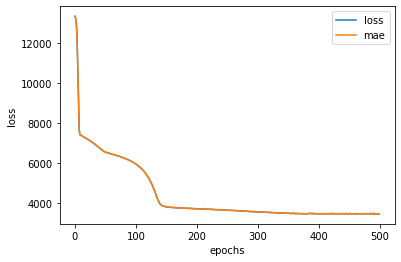

In [38]:
pd.DataFrame(model_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [39]:
# can notice that after 250 epochs, not much improvement is seen

# End of Notes